# Source estimation

In [1]:
import os.path as op
import os
import mne
from mne.datasets import sample

data_path = sample.data_path()
# the raw file containing the channel location + types
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'

# The paths to Freesurfer reconstructions
subjects_dir = data_path + '/subjects'
os.environ['SUBJECTS_DIR'] = subjects_dir
subject = 'sample'
raw = mne.io.read_raw_fif(raw_fname)
events = mne.find_events(raw = raw, stim_channel = 'STI 014')
event_id = dict(aud_r=2, vis_r=4)
epochs = mne.Epochs(raw=raw, events = events, event_id = event_id)
evoked = epochs.average()
conductivity = [0.3] # for single layer
model = mne.make_bem_model(subject=subject, ico=4, conductivity= conductivity, subjects_dir=subjects_dir, verbose=None)
bem = mne.make_bem_solution(model)
trans = data_path + '/MEG/sample/sample_audvis_raw-trans.fif'
src = mne.setup_source_space(subject, spacing='oct4', add_dist='patch', subjects_dir=subjects_dir)
fwd = mne.make_forward_solution(raw_fname, trans=trans, src=src, bem=bem, meg=True, eeg=False, mindist=5.0, n_jobs=1, verbose=True)
cov = mne.compute_covariance(epochs, method='auto')
inv = mne.minimum_norm.make_inverse_operator(raw.info, fwd, cov, loose=0.2)
stc = mne.minimum_norm.apply_inverse(evoked, inv, lambda2=1. / 9.)
stc.plot(hemi='both')

Opening raw data file /Users/kumadaken/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
Not setting metadata
144 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Creating the BEM geometry...
Going from 4th to 4th subdivision of an icosahedron (n_tri: 5120 -> 5120)
inner skull CM is   0.67 -10.01  44.26 mm
Surfaces passed the basic topology checks.
Complete.

Approximation method : Linear collocation

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
 

<ipython-input-1-d7e1d530adbd>:25: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  cov = mne.compute_covariance(epochs, method='auto')


Reducing data rank from 364 -> 361
Estimating covariance using SHRUNK
Done.
Estimating covariance using DIAGONAL_FIXED
    MAG regularization : 0.1
    GRAD regularization : 0.1
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    MAG regularization : 0.1
    GRAD regularization : 0.1
    EEG regularization : 0.1
    MAG regularization : 0.1
    GRAD regularization : 0.1
    EEG regularization : 0.1
    MAG regularization : 0.1
    GRAD regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 60624
log-likelihood on unseen data (descending order):
   shrunk: -1804.628
   empirical: -1805.897
   diagonal_fixed: -1842.387
selecting best estimator: shrunk
[done]
Converting forward solution to surface orientation
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
info["bads"] and n

/opt/anaconda3/envs/mne/lib/python3.8/site-packages/pyvistaqt/plotting.py:704: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  self.app_window.setBaseSize(*window_size)


In [7]:
%matplotlib qt

In [8]:
import pathlib
import matplotlib
import matplotlib.pyplot as plt
import mne_bids
import mne

matplotlib.use('Qt5Agg')
mne.set_log_level('warning')

## Start with some fresh epochs

In [9]:
bids_root = pathlib.Path('../../Result') /'Mne_Result'/'sample_BIDS'

bids_path = mne_bids.BIDSPath(subject='01',
                              session='01',
                              task='audiovisual',
                              run='01',
                              datatype='meg',
                              root=bids_root)

raw = mne_bids.read_raw_bids(bids_path)
raw.load_data()
raw.filter(l_freq=0.1, h_freq=40)
events, event_id = mne.events_from_annotations(raw)

tmin = -0.200
tmax = 0.500
baseline = (None, 0)

epochs = mne.Epochs(raw,
                    events=events,
                    event_id=event_id,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=baseline,
                    preload=True,
                    proj=False)
epochs.save(pathlib.Path('../../Result') /'Mne_Result'/'sample_BIDS'/'sub-01'/'ses-01'/ 'epochs_for_source_epo.fif', overwrite=True)
epochs.info

<ipython-input-9-63974c8a4125>:10: RuntimeWarning: The unit for channel(s) STI 001, STI 002, STI 003, STI 004, STI 005, STI 006, STI 014, STI 015, STI 016 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


Overwriting existing file.


<Info | 23 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 line_freq: 60
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
 subject_info: 5 items (dict)
>

## View the BEM

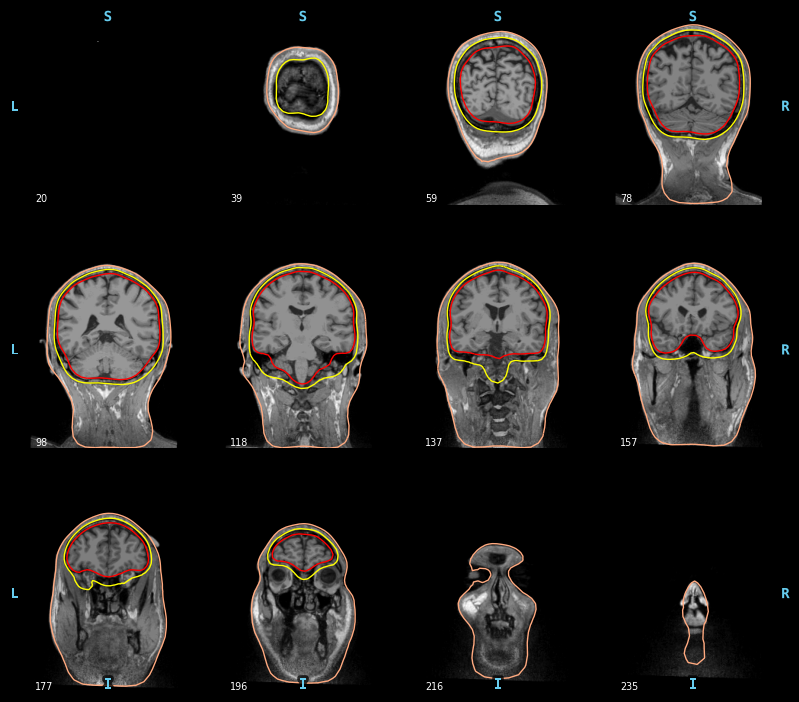

In [10]:
subjects_dir = pathlib.Path(mne.datasets.sample.data_path()) / 'subjects'

mne.viz.plot_bem(subject='sample', subjects_dir=subjects_dir,
                 orientation='coronal')

## Coregistration!

In [11]:
epochs_fname = pathlib.Path('../../Result') /'Mne_Result'/'sample_BIDS'/'sub-01'/'ses-01'/ 'epochs_for_source_epo.fif'

#mne.gui.coregistration(subject='sample', subjects_dir=subjects_dir,inst=epochs_fname)

In [12]:
trans_fname = pathlib.Path('../../Result') /'Mne_Result'/'sample_BIDS'/'sub-01'/'ses-01' / 'sample-trans.fif'
epochs_fname = pathlib.Path('../../Result') /'Mne_Result'/'sample_BIDS'/'sub-01'/'ses-01'/ 'epochs_for_source_epo.fif'
subjects_dir = pathlib.Path(mne.datasets.sample.data_path()) / 'subjects'


info = mne.io.read_info(epochs_fname)
fig = mne.viz.plot_alignment(info=info, trans=trans_fname, subject='sample', dig=True,
                             subjects_dir=subjects_dir, verbose=True)

Using outer_skin.surf for head surface.
Getting helmet for system 306m
Using mayavi 3d backend.



## Compute the source space

In [13]:
subject = 'sample'
src = mne.setup_source_space(subject=subject,
                             spacing='oct4',  # Use oct6 during an actual analysis!
                             subjects_dir=subjects_dir,
                             add_dist=False)  # Remove this one during an actual analysis!
src

<SourceSpaces: [<surface (lh), n_vertices=155407, n_used=258>, <surface (rh), n_vertices=156866, n_used=258>] MRI (surface RAS) coords, subject 'sample', ~22.7 MB>

In [14]:
mne.viz.plot_alignment(info=info, trans=trans_fname, subject=subject,
                       src=src, subjects_dir=subjects_dir, dig=True,
                       surfaces=['head-dense', 'white'], coord_frame='meg')

## Compute the forward solution!

In [15]:
conductivity = (0.3,)  # for single layer – used in MEG
# conductivity = (0.3, 0.006, 0.3)  # for three layers – used in EEG
model = mne.make_bem_model(subject=subject, ico=4,
                           conductivity=conductivity,
                           subjects_dir=subjects_dir)
model

[{'id': 1 (FIFFV_BEM_SURF_ID_BRAIN),
  'sigma': 0.3,
  'np': 2562,
  'ntri': 5120,
  'coord_frame': array([5]),
  'rr': array([[ 0.0006128, -0.007984 ,  0.103732 ],
         [ 0.0568749, -0.0089022,  0.073789 ],
         [ 0.0235464,  0.0574384,  0.0829638],
         ...,
         [ 0.007272 ,  0.0033751, -0.0268523],
         [ 0.0017443,  0.0061639, -0.0268488],
         [ 0.0038775,  0.003904 , -0.0327116]]),
  'nn': array([[-1.41976393e-05,  1.38905590e-18,  1.00000000e+00],
         [ 8.94547443e-01,  0.00000000e+00,  4.46973010e-01],
         [ 2.76442723e-01,  8.50701266e-01,  4.47086991e-01],
         ...,
         [ 9.06305003e-02,  1.47212416e-01, -9.84943966e-01],
         [ 1.32152692e-02,  1.72348009e-01, -9.84947471e-01],
         [ 3.46996163e-02,  1.06791635e-01, -9.93675744e-01]]),
  'tris': array([[   0,  644,  642],
         [ 642,  643,  162],
         [ 644,  643,  642],
         ...,
         [2561, 2201,  557],
         [2477, 2201, 2561],
         [2477,   11, 2

In [16]:
bem_sol = mne.make_bem_solution(model)
bem_sol

<ConductorModel | BEM (1 layer)>

In [17]:
bem_fname = pathlib.Path('../../Result') /'Mne_Result'/'sample_BIDS'/'sub-01'/'ses-01' / 'sample_bem.fif'
mne.bem.write_bem_solution(bem_fname, bem_sol, overwrite=True)

In [18]:
fwd = mne.make_forward_solution(info,
                                trans=trans_fname,
                                src=src,
                                bem=bem_sol,
                                meg=True, # include MEG channels
                                eeg=False, # exclude EEG channels
                                mindist=5.0, # ignore sources <= 5mm from inner skull
                                n_jobs=1) # number of jobs to run in parallel
fwd

<Forward | MEG channels: 306 | EEG channels: 0 | Source space: Surface with 474 vertices | Source orientation: Free>

In [19]:
fwd_fname = pathlib.Path('../../Result') /'Mne_Result'/'sample_BIDS'/'sub-01'/'ses-01'/ 'sample_fwd.fif'
mne.write_forward_solution(fwd_fname, fwd, overwrite=True)

## Compute noise covariance

In [20]:
noise_cov = mne.compute_covariance(epochs, tmax=0.,
                                   method=['shrunk', 'empirical'],
                                   rank='info')
mne.viz.plot_cov(noise_cov, info=info)

<ipython-input-20-807256be6b60>:1: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  noise_cov = mne.compute_covariance(epochs, tmax=0.,


(<Figure size 1139x370 with 6 Axes>, <Figure size 1139x370 with 3 Axes>)

<ipython-input-21-2eb59ca8d625>:1: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  epochs.average().plot_white(noise_cov)


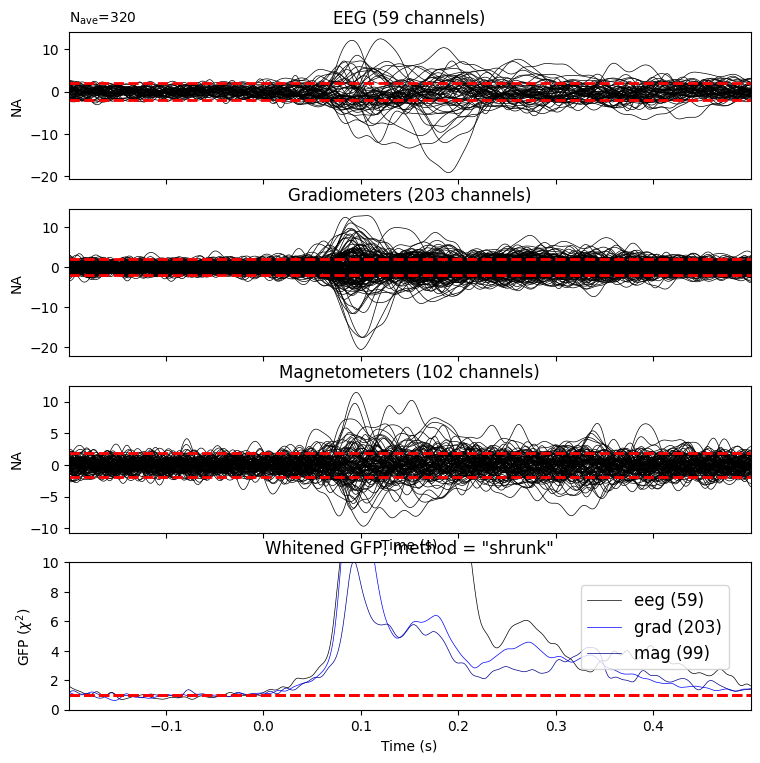

In [21]:
epochs.average().plot_white(noise_cov)

## Create the inverse operator

In [22]:
from mne.forward import read_forward_solution
from mne.minimum_norm import (make_inverse_operator, apply_inverse,
                              write_inverse_operator)

In [23]:
# make an M/EEG, MEG-only, and EEG-only inverse operator
info = epochs.info
inverse_operator = make_inverse_operator(info, fwd, noise_cov,
                                         loose=0.2, depth=0.8)

## Apply the inverse operator -> Calculate the source estimate

In [24]:
method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2
stc = apply_inverse(epochs['Auditory/Left'].average(), 
                    inverse_operator, lambda2,
                    method=method, pick_ori=None)

## Show the result!

In [ ]:
brain = stc.plot(surface='inflated',
                 hemi='both',
                 subjects_dir=subjects_dir,
                 time_viewer=True)